In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('data_final.csv')

In [5]:
data = data.drop('Unnamed: 0', axis=1)

In [6]:
data.head()

,0,19,20,25,31,40,43,52,58,61,...,318,321,329,341,356,365,367,368,373,Pass/Fail
0,0.469231,0.242124,0.797675,0.398104,0.121293,0.319010,0.411986,0.138291,0.221741,0.762021,...,0.155453,0.041580,0.014323,0.000000,0.229765,0.150986,0.112244,0.709375,0.151239,-1
1,0.575003,0.238978,0.712274,0.964903,0.139530,0.360565,0.535243,0.151144,0.204983,0.833427,...,0.229751,0.039419,0.014288,0.000000,0.115285,0.102807,0.068396,0.753125,0.220339,-1
2,0.308868,0.238104,0.738940,0.989554,0.067069,0.340259,0.408149,0.267903,0.175564,0.727359,...,0.172564,0.037459,0.025803,0.244275,0.983876,0.077769,0.050771,0.562500,0.589309,1
3,0.400385,0.235237,0.724308,0.955045,0.068333,0.340259,0.447084,0.270716,0.168451,0.750309,...,0.139495,0.052237,0.016615,0.000000,0.434376,0.055956,0.043312,0.662500,0.152542,-1
4,0.471367,0.234118,0.720752,0.949862,0.073974,1.000000,0.328147,0.084682,0.350179,0.738046,...,0.162191,0.024435,0.015655,0.000000,0.138504,0.090288,0.069148,0.068750,0.152542,-1


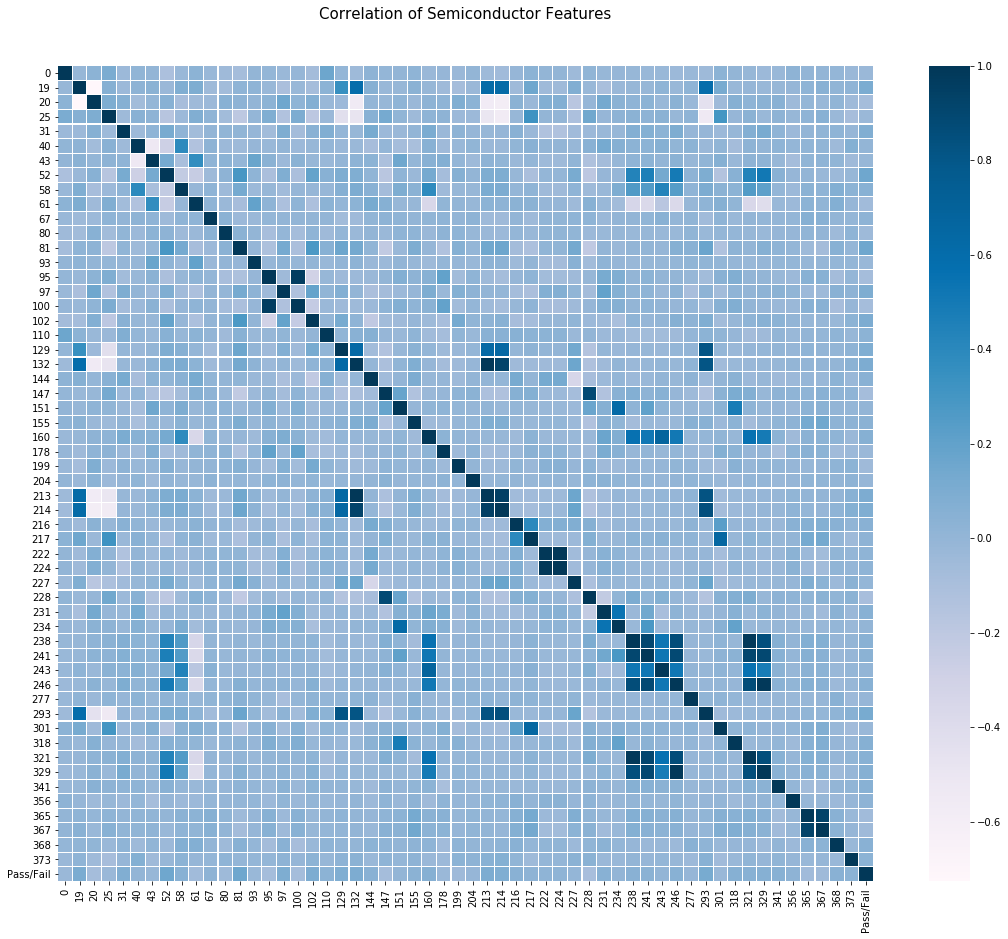

In [14]:
colormap = plt.cm.PuBu 
plt.figure(figsize=(20, 15)) 
plt.title("Correlation of Semiconductor Features", y = 1.05, size = 15)
sns.heatmap(data.corr(), linewidths = 0.1, vmax = 1.0, square = True, cmap = colormap, linecolor = "white", annot = False)

In [40]:
(data.corr()['Pass/Fail']).sort_values(ascending=False).head(10)

Pass/Fail    1.000000
52           0.156008
81           0.151230
293          0.119936
19           0.108333
102          0.102799
213          0.101672
132          0.099506
97           0.094168
129          0.089233
Name: Pass/Fail, dtype: float64

In [46]:
data['Pass/Fail'].value_counts()

-1    1463
 1     104
Name: Pass/Fail, dtype: int64

# Null 처리
- 하나라도 null이 있는 열: 538

In [120]:
data_before = pd.read_csv('uci-secom.csv')

In [121]:
data_before = data_before.drop('Time', axis=1)

In [122]:
null = []
Not_null = []
null = data_before.isnull().sum()

for i in null.index:
    if null[i] == 0:
        Not_null.append(i)

In [123]:
null = data_before.isnull().sum()
null = null.drop(Not_null)

In [125]:
null = pd.DataFrame(null)

In [127]:
null['전체비율'] = 100

In [128]:
null.rename(columns = {0:'Null 수'}, inplace = True)

In [130]:
null.head()

,Null 수,전체비율
0,6,100
1,7,100
2,14,100
3,14,100
4,14,100


In [168]:
null.index

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '580', '581', '582', '583', '584', '585', '586', '587', '588', '589'],
      dtype='object', length=538)

In [133]:
len(data_before)

1567

In [163]:
null = null.astype(float)

In [166]:
for i in null.index:
    null['전체비율'][i] = (null['Null 수'][i]/len(data_before))*100

In [170]:
null.head()

,Null 수,전체비율
0,6.0,0.382897
1,7.0,0.446713
2,14.0,0.893427
3,14.0,0.893427
4,14.0,0.893427


## null값이 전체 행의 40%를 차지하는 열 제거
- 32개 열 제거
- 506개 열이 남음 

In [182]:
null_40 = []

for i in null.index:
    if null['전체비율'][i] > 40 :
        null_40.append(i)

In [183]:
len(null_40)

32

In [184]:
null_40

['72',
 '73',
 '85',
 '109',
 '110',
 '111',
 '112',
 '157',
 '158',
 '220',
 '244',
 '245',
 '246',
 '247',
 '292',
 '293',
 '345',
 '346',
 '358',
 '382',
 '383',
 '384',
 '385',
 '492',
 '516',
 '517',
 '518',
 '519',
 '578',
 '579',
 '580',
 '581']

In [190]:
null = null.drop(null_40, axis=0 )

In [193]:
null.index

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '568', '569', '582', '583', '584', '585', '586', '587', '588', '589'],
      dtype='object', length=506)

Text(0, 0.5, 'Column')

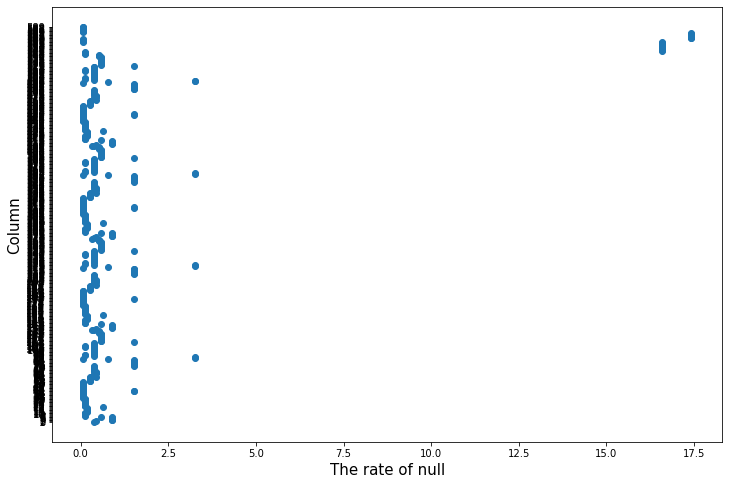

In [196]:
plt.figure(figsize=(12,8))
plt.scatter(null['전체비율'],null.index)
plt.xlabel('The rate of null',fontsize=15)
plt.ylabel('Column',fontsize=15)

## 전체 행의 15% 이상의 null값을 가지는 열
- 범주형 변수인지 숫자형 변수인지 알 수 없어 null값을 대체하는데 한계가 존재 
- 범주형 변수일 경우 최빈값으로 결측치를 처리하는게 좋다고 판단
- 숫자형 변수일 경우 평균값으로 결측치를 처리하는게 좋다고 판단
- 하지만 40% 이상 null값이 있는 열 제거, 하나의 값만 존재하는 열 제거 후, 값의 분포를 살펴보면 범주형 변수는 없음을 확인 



- 15% 이상의 null값을 가지는 열 수: 20개 
- 20개 변수 제거 
- 486개 변수 남음

In [198]:
null_15 = []

for i in null.index:
    if null['전체비율'][i] > 15 :
        null_15.append(i)

In [213]:
len(null_15)

20

In [199]:
null_15

['546',
 '547',
 '548',
 '549',
 '550',
 '551',
 '552',
 '553',
 '554',
 '555',
 '556',
 '557',
 '562',
 '563',
 '564',
 '565',
 '566',
 '567',
 '568',
 '569']

In [203]:
(data_before.loc[:,"546":"557"]).head()
# 범주형 변수 아님, 수치형 변수 

,546,547,548,549,550,551,552,553,554,555,556,557
0,1.0616,395.570,75.752,0.4234,12.93,0.78,0.1827,5.7349,0.3363,39.8842,3.2687,1.0297
1,1.3526,408.798,74.640,0.7193,16.00,1.33,0.2829,7.1196,0.4989,53.1836,3.9139,1.7819
2,0.7942,411.136,74.654,0.1832,16.16,0.85,0.0857,7.1619,0.3752,23.0713,3.9306,1.1386
3,1.1650,372.822,72.442,1.8804,131.68,39.33,0.6812,56.9303,17.4781,161.4081,35.3198,54.2917
4,1.4636,399.914,79.156,1.0388,19.63,1.98,0.4287,9.7608,0.8311,70.9706,4.9086,2.5014


In [206]:
(data_before.loc[:,"562":"569"]).head()
# 범주형 변수 아님, 수치형 변수 

,562,563,564,565,566,567,568,569
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,267.064,0.9032,1.10,0.6219,0.4122,0.2562,0.4119,68.8489
3,268.228,0.6511,7.32,0.1630,3.5611,0.0670,2.7290,25.0363
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [209]:
null = null.drop(null_15, axis=0)

Text(0.5, 1.0, '564 vs Pass/Fail')

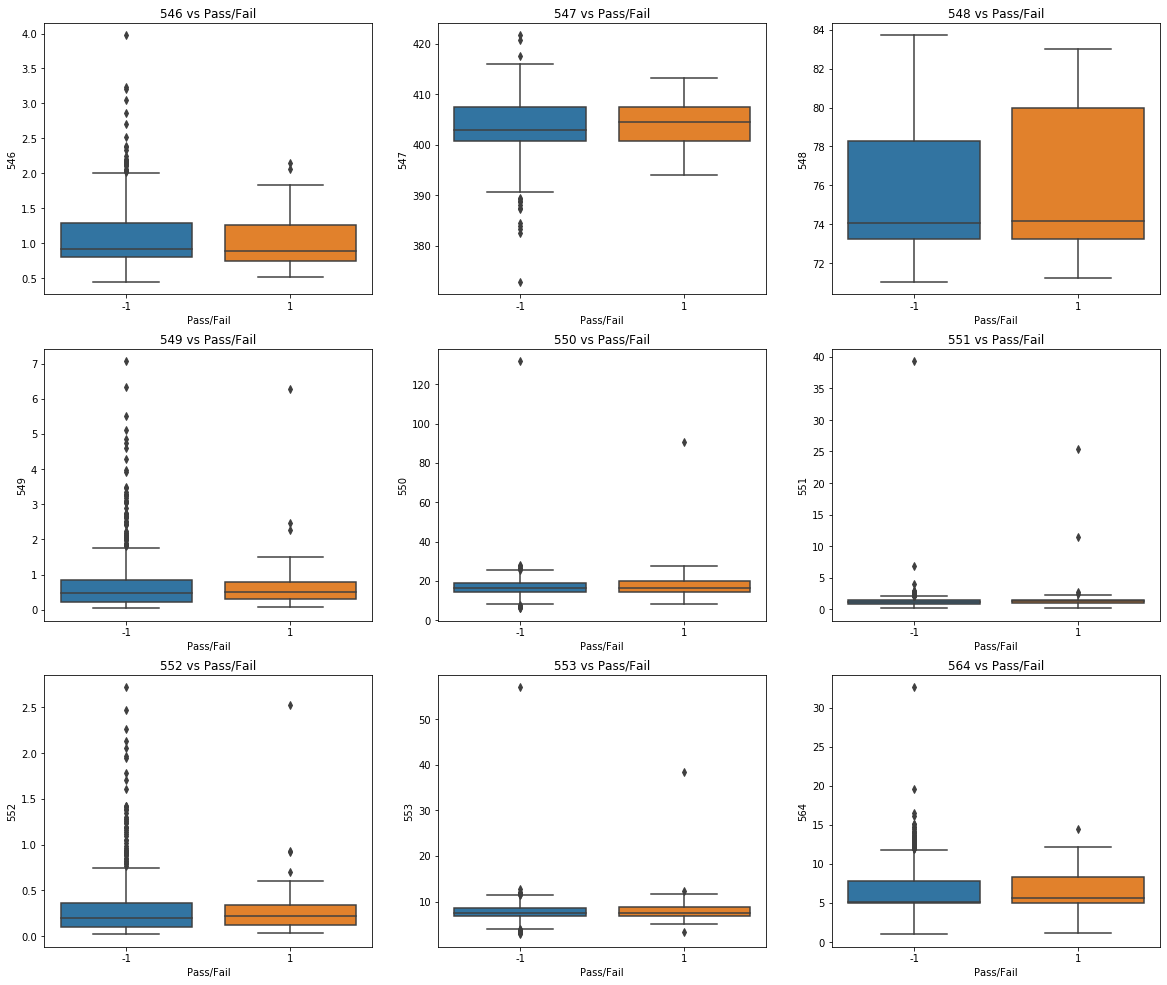

In [200]:
f, axes = plt.subplots(ncols=3, nrows=3, figsize=(20,17))

sns.boxplot(x='Pass/Fail',y='546',data=data_before, ax=axes[0][0])
axes[0][0].set_title('546 vs Pass/Fail')

sns.boxplot(x='Pass/Fail',y='547',data=data_before, ax=axes[0][1])
axes[0][1].set_title('547 vs Pass/Fail')

sns.boxplot(x='Pass/Fail',y='548',data=data_before, ax=axes[0][2])
axes[0][2].set_title('548 vs Pass/Fail')

sns.boxplot(x='Pass/Fail',y='549',data=data_before, ax=axes[1][0])
axes[1][0].set_title('549 vs Pass/Fail')

sns.boxplot(x='Pass/Fail',y='550',data=data_before, ax=axes[1][1])
axes[1][1].set_title('550 vs Pass/Fail')

sns.boxplot(x='Pass/Fail',y='551',data=data_before, ax=axes[1][2])
axes[1][2].set_title('551 vs Pass/Fail')

sns.boxplot(x='Pass/Fail',y='552',data=data_before, ax=axes[2][0])
axes[2][0].set_title('552 vs Pass/Fail')

sns.boxplot(x='Pass/Fail',y='553',data=data_before, ax=axes[2][1])
axes[2][1].set_title('553 vs Pass/Fail')

sns.boxplot(x='Pass/Fail',y='564',data=data_before, ax=axes[2][2])
axes[2][2].set_title('564 vs Pass/Fail')

# Pass, Fail에 따른 값의 분포가 모든 변수에서 차이가 없음
# 즉, Pass/Fail의 특성을 반영하지 못하는 변수임을 의미 
# 15% 이상의 결측치를 가지는 변수 제거 
# 이외의 변수들은 5% 이하의 결측치를 갖고, 수치형 변수이므로 median으로 결측치 처리 진행 

## 전체 행의 15% 이상의 결측치를 갖는 변수 제거
- 5% 이하의 결측치를 갖는 변수 excel로 확인 결과 모두 수치형 변수 
- median으로 결측치 처리 진행

In [224]:
# 총 590개의 열 존재
# 40% 이상인 열 제거 : 32개 제거 -> 558개 변수 남음
# 15% 이상인 열 제거 : 20개 제거 -> 538개 변수 남음 

In [221]:
# data_before = data_before.drop(null_40, axis=1)

In [222]:
data_before = data_before.drop(null_15, axis=1)

In [223]:
data_before.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 539 entries, 0 to Pass/Fail
dtypes: float64(538), int64(1)
memory usage: 6.4 MB


## 전체 행의 5% 이하의 null값을 가지는 열 대체 
- 5% 이하의 결측치를 갖는 변수 excel로 확인 결과 모두 수치형 변수 
- median으로 결측치 처리 진행

In [228]:
data_before.replace(np.nan, data_before.median(), inplace=True)

In [229]:
data_before.isnull().any().any()

False

# 행의 값이 모두 같은 열 제거 
- 의미없는 행이라고 판단. 제거 진행 
- 행의 값이 1개로 같은 경우 모두 제거: 107개 열 제거 -> 431개 변수 남음
- 행의 값이 2개인 경우 어떻게 처리해야할지 고민 

In [281]:
for i in data_before.columns:
    tmp =  data_before[i].unique() # data[i].unique()
    if len(tmp) < 10 :
        print(i)
        print(tmp)

5
[100.]
13
[0.]
42
[70.]
49
[1.]
52
[0.         0.15185354]
69
[1.]
74
[0.     4.1955]
97
[0.         0.52238806]
141
[0.]
149
[0.]
178
[0.         0.13513514]
179
[0.]
186
[0.]
189
[0.]
190
[0.]
191
[0.]
192
[0.]
193
[0.]
194
[0.]
206
[0. 2.]
209
[ 0.   46.15]
226
[0.]
229
[0.]
230
[0.]
231
[0.         0.36607371]
232
[0.]
233
[0.]
234
[0.        0.0428513]
235
[0.]
236
[0.]
237
[0.]
240
[0.]
241
[0.         0.01840445]
242
[0.]
243
[0.         0.01301986]
256
[0.]
257
[0.]
258
[0.]
259
[0.]
260
[0.]
261
[0.]
262
[0.]
263
[0.]
264
[0.]
265
[0.]
266
[0.]
276
[0.]
284
[0.]
313
[0.]
314
[0.]
315
[0.]
322
[0.]
325
[0.]
326
[0.]
327
[0.]
328
[0.]
329
[0.         0.01233779]
330
[0.]
342
[0.     0.4472]
347
[ 0.     13.9147]
364
[0.]
369
[0.]
370
[0.]
371
[0.]
372
[0.]
373
[0.         0.15123859]
374
[0.]
375
[0.]
378
[0.]
379
[0.]
380
[0.]
381
[0.]
394
[0.]
395
[0.]
396
[0.]
397
[0.]
398
[0.]
399
[0.]
400
[0.]
401
[0.]
402
[0.]
403
[0.]
404
[0.]
414
[0.]
422
[0.]
449
[0.]
450
[0.]
451
[0.

In [287]:
# 변수의 값이 두개인 열 15개 존재 
columns_have_2 = []
for i in data_before.columns:
    tmp =  data_before[i].unique() # data[i].unique()
    if len(tmp) == 2:
        print(i)
        print(tmp)
        columns_have_2.append(i)

52
[0.         0.15185354]
74
[0.     4.1955]
97
[0.         0.52238806]
178
[0.         0.13513514]
206
[0. 2.]
209
[ 0.   46.15]
231
[0.         0.36607371]
234
[0.        0.0428513]
241
[0.         0.01840445]
243
[0.         0.01301986]
329
[0.         0.01233779]
342
[0.     0.4472]
347
[ 0.     13.9147]
373
[0.         0.15123859]
478
[  0. 200.]
Pass/Fail
[-1  1]


In [290]:
columns_have_2.remove('Pass/Fail')

In [291]:
columns_have_2

['52',
 '74',
 '97',
 '178',
 '206',
 '209',
 '231',
 '234',
 '241',
 '243',
 '329',
 '342',
 '347',
 '373',
 '478']

In [276]:
unique_columns = []
for i in data_before.columns:
    tmp =  data_before[i].unique() # data[i].unique()
    if len(tmp) < 2:
        print(i)
        print(tmp)
        unique_columns.append(i)

5
[100.]
13
[0.]
42
[70.]
49
[1.]
69
[1.]
141
[0.]
149
[0.]
179
[0.]
186
[0.]
189
[0.]
190
[0.]
191
[0.]
192
[0.]
193
[0.]
194
[0.]
226
[0.]
229
[0.]
230
[0.]
232
[0.]
233
[0.]
235
[0.]
236
[0.]
237
[0.]
240
[0.]
242
[0.]
256
[0.]
257
[0.]
258
[0.]
259
[0.]
260
[0.]
261
[0.]
262
[0.]
263
[0.]
264
[0.]
265
[0.]
266
[0.]
276
[0.]
284
[0.]
313
[0.]
314
[0.]
315
[0.]
322
[0.]
325
[0.]
326
[0.]
327
[0.]
328
[0.]
330
[0.]
364
[0.]
369
[0.]
370
[0.]
371
[0.]
372
[0.]
374
[0.]
375
[0.]
378
[0.]
379
[0.]
380
[0.]
381
[0.]
394
[0.]
395
[0.]
396
[0.]
397
[0.]
398
[0.]
399
[0.]
400
[0.]
401
[0.]
402
[0.]
403
[0.]
404
[0.]
414
[0.]
422
[0.]
449
[0.]
450
[0.]
451
[0.]
458
[0.]
461
[0.]
462
[0.]
463
[0.]
464
[0.]
465
[0.]
466
[0.]
481
[0.]
498
[0.]
501
[0.]
502
[0.]
503
[0.]
504
[0.]
505
[0.]
506
[0.]
507
[0.]
508
[0.]
509
[0.]
512
[0.]
513
[0.]
514
[0.]
515
[0.]
528
[0.]
529
[0.]
530
[0.]
531
[0.]
532
[0.]
533
[0.]
534
[0.]
535
[0.]
536
[0.]
537
[0.]
538
[0.]


In [277]:
unique_columns

['5',
 '13',
 '42',
 '49',
 '69',
 '141',
 '149',
 '179',
 '186',
 '189',
 '190',
 '191',
 '192',
 '193',
 '194',
 '226',
 '229',
 '230',
 '232',
 '233',
 '235',
 '236',
 '237',
 '240',
 '242',
 '256',
 '257',
 '258',
 '259',
 '260',
 '261',
 '262',
 '263',
 '264',
 '265',
 '266',
 '276',
 '284',
 '313',
 '314',
 '315',
 '322',
 '325',
 '326',
 '327',
 '328',
 '330',
 '364',
 '369',
 '370',
 '371',
 '372',
 '374',
 '375',
 '378',
 '379',
 '380',
 '381',
 '394',
 '395',
 '396',
 '397',
 '398',
 '399',
 '400',
 '401',
 '402',
 '403',
 '404',
 '414',
 '422',
 '449',
 '450',
 '451',
 '458',
 '461',
 '462',
 '463',
 '464',
 '465',
 '466',
 '481',
 '498',
 '501',
 '502',
 '503',
 '504',
 '505',
 '506',
 '507',
 '508',
 '509',
 '512',
 '513',
 '514',
 '515',
 '528',
 '529',
 '530',
 '531',
 '532',
 '533',
 '534',
 '535',
 '536',
 '537',
 '538']

In [278]:
len(unique_columns)

107

In [284]:
data_before = data_before.drop(unique_columns, axis=1)

In [286]:
data_before.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 432 entries, 0 to Pass/Fail
dtypes: float64(431), int64(1)
memory usage: 5.2 MB


In [292]:
data_before.to_csv('data_before.csv')

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('data_before.csv')

In [4]:
data = data.drop('Unnamed: 0', axis=1)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 432 entries, 0 to Pass/Fail
dtypes: float64(431), int64(1)
memory usage: 5.2 MB


# 스케일링

Text(0.5, 1.0, '129 vs Pass/Fail')

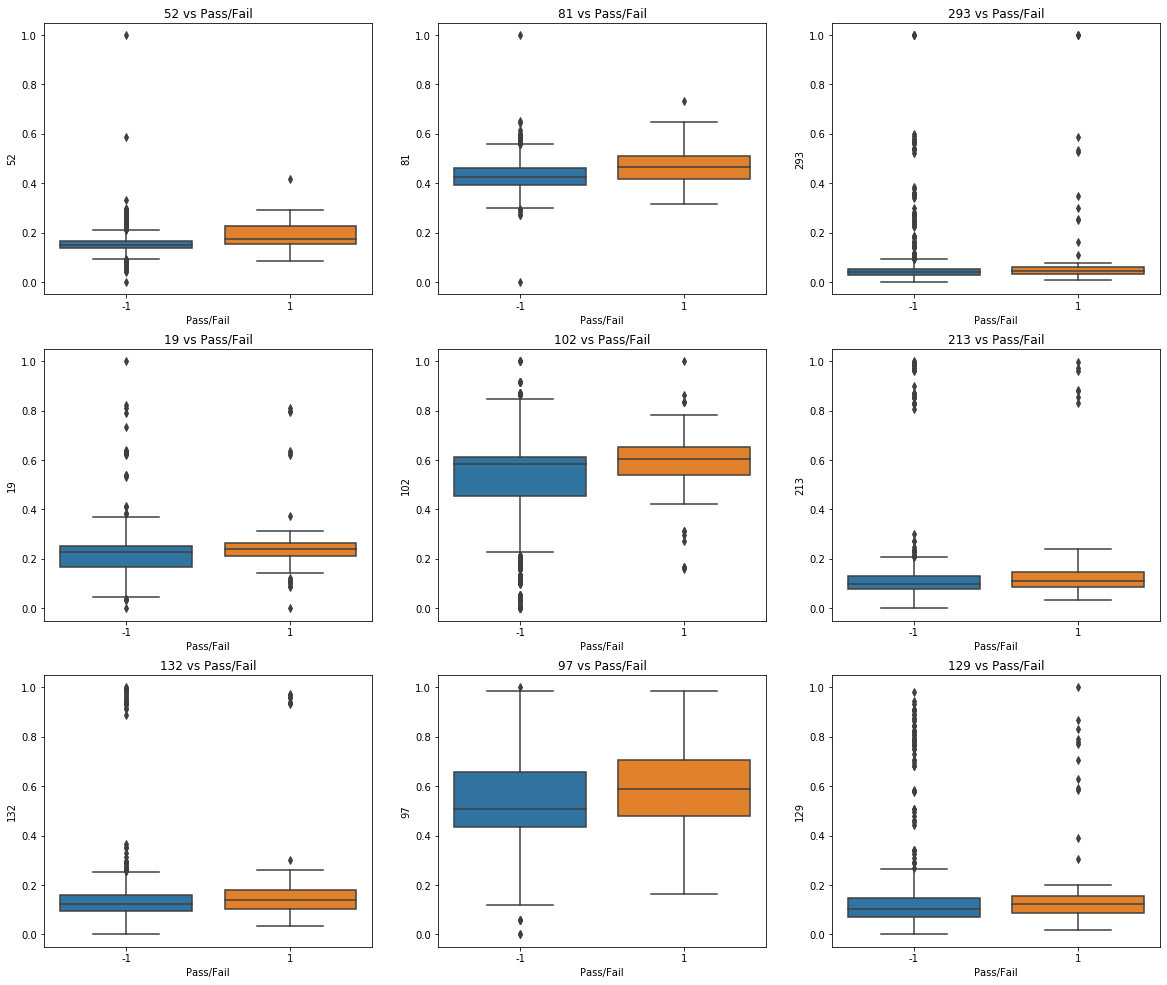

In [56]:
f, axes = plt.subplots(ncols=3, nrows=3, figsize=(20,17))

sns.boxplot(x='Pass/Fail',y='52',data=data, ax=axes[0][0])
axes[0][0].set_title('52 vs Pass/Fail')

sns.boxplot(x='Pass/Fail',y='81',data=data, ax=axes[0][1])
axes[0][1].set_title('81 vs Pass/Fail')

sns.boxplot(x='Pass/Fail',y='293',data=data, ax=axes[0][2])
axes[0][2].set_title('293 vs Pass/Fail')

sns.boxplot(x='Pass/Fail',y='19',data=data, ax=axes[1][0])
axes[1][0].set_title('19 vs Pass/Fail')

sns.boxplot(x='Pass/Fail',y='102',data=data, ax=axes[1][1])
axes[1][1].set_title('102 vs Pass/Fail')

sns.boxplot(x='Pass/Fail',y='213',data=data, ax=axes[1][2])
axes[1][2].set_title('213 vs Pass/Fail')

sns.boxplot(x='Pass/Fail',y='132',data=data, ax=axes[2][0])
axes[2][0].set_title('132 vs Pass/Fail')

sns.boxplot(x='Pass/Fail',y='97',data=data, ax=axes[2][1])
axes[2][1].set_title('97 vs Pass/Fail')

sns.boxplot(x='Pass/Fail',y='129',data=data, ax=axes[2][2])
axes[2][2].set_title('129 vs Pass/Fail')

In [48]:
# Pass=-1, Fail=+1

In [49]:
# Class가 Pass일 때의 이상치 탐지 
def remove_outlier(data, column):
    target_column_data = data[data["Pass/Fail"]==-1][column]
    quan_25 = np.percentile(target_column_data, values, 25)
    quan_75 = np.percentile(target_column_data, values, 75)
    
    iqr = quan_75 - quan_25
    iqr = iqr*1.5
    lowest = quan_25 - iqr
    highest = quan_75 + iqr
    outlier_index = target_column_data[(target_column_data <lowest) | (target_column_data > highest)].index
    print(outlier_index)
    return data

In [50]:
data_copy = data.copy()

In [ ]:
remove_outlier(data_copy, )

# XGBClassifier
- 모델이 무겁고 시간이 오래 걸리므로 보통은 hyperparameter 튜닝을 적게 진행함 

In [19]:
from xgboost import plot_importance
from xgboost import XGBClassifier

In [21]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [23]:
df['Pass/Fail'].value_counts()

-1    1435
 1      95
Name: Pass/Fail, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler

random_state = []

for j in range(1,101): 
    random_state.append(j)
ai = []
for rand in random_state:
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state= rand,stratify=y)
  xgb_clf = XGBClassifier(n_estimators=500, learning_rate = 0.1, max_depth= 4)
  xgb_clf.fit(X_train, y_train)
  pred_proba_1 = xgb_clf.predict_proba(X_test)[:,1]
  auc_test = roc_auc_score(y_test, pred_proba_1)
  print('random_state=', rand,'  ' ,'auc_test =', auc_test)
  print('')
  ai.append(auc_test)
print("평균 = ", np.mean(ai))

random_state= 1    auc_test = 0.7738859343480653

random_state= 2    auc_test = 0.818815331010453

random_state= 3    auc_test = 0.7826884283880433

random_state= 4    auc_test = 0.8745644599303135

random_state= 5    auc_test = 0.7672840638180818

random_state= 6    auc_test = 0.7388593434806529

random_state= 7    auc_test = 0.7874564459930313

random_state= 8    auc_test = 0.6611039794608473

random_state= 9    auc_test = 0.7850724371905373

random_state= 10    auc_test = 0.737208875848157

random_state= 11    auc_test = 0.7150192554557124

random_state= 12    auc_test = 0.8200990280579498

random_state= 13    auc_test = 0.770401613790574

random_state= 14    auc_test = 0.7403264258206491

random_state= 15    auc_test = 0.814780854575463

random_state= 16    auc_test = 0.852374839537869

random_state= 17    auc_test = 0.768384375573079

random_state= 18    auc_test = 0.7753530166880616

random_state= 19    auc_test = 0.7828718136805428

random_state= 20    auc_test = 0.7401430405281

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler

random_state = []

for j in range(1,101): 
    random_state.append(j)
ai = []

for rand in random_state:
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state= rand,stratify=y)
  log_reg = LogisticRegression(random_state=13,solver='liblinear',C=10.0)
  log_reg.fit(X_train, y_train)
  pred_proba_1 = log_reg.predict_proba(X_test)[:,1]
  auc_test = roc_auc_score(y_test, pred_proba_1)
  print('random_state=', rand,'  ' ,'auc_test =', auc_test)
  print('')
  ai.append(auc_test)
print("평균 = ", np.mean(ai))

random_state= 1    auc_test = 0.7802697870957256

random_state= 2    auc_test = 0.7872582480091013

random_state= 3    auc_test = 0.7258248009101251

random_state= 4    auc_test = 0.7617422395579392

random_state= 5    auc_test = 0.6697545912562977

random_state= 6    auc_test = 0.758654314968308

random_state= 7    auc_test = 0.7687307004713149

random_state= 8    auc_test = 0.7290752478465788

random_state= 9    auc_test = 0.7159109377539411

random_state= 10    auc_test = 0.7146107589793597

random_state= 11    auc_test = 0.7646676418007476

random_state= 12    auc_test = 0.7645051194539249

random_state= 13    auc_test = 0.7729562814887047

random_state= 14    auc_test = 0.7651552088412157

random_state= 15    auc_test = 0.7778319518933854

random_state= 16    auc_test = 0.7497155858930603

random_state= 17    auc_test = 0.7188363399967495

random_state= 18    auc_test = 0.8158621810498943

random_state= 19    auc_test = 0.7357386640663091

random_state= 20    auc_test = 0.77311880

In [20]:
# 평균 =  0.7884706647163986